In [1]:
import torch
import argparse
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchsummary import summary as summary_

def unittest(test_type):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    if test_type == 'model':
        fcn8s = CustomFCN8s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

        fcn8s = CustomFCN16s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

        fcn8s = CustomFCN32s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

    elif test_type == 'data':
        train_path = 'train.json'
        dataset = RecycleTrashDataset(data_dir=train_path)
        num = random.randint(0, 500)
        images, masks, _ = dataset.__getitem__(num)

        print(images.shape, masks.shape)
        print(type(images), type(masks))

        plt.imshow(images.astype(np.uint8))
        plt.imshow(masks)
        plt.show()       

/opt/ml/vim-hjk
loading annotations into memory...
Done (t=3.28s)
creating index...
index created!
(512, 512, 3) (512, 512)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


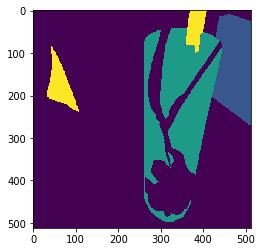

In [2]:
if __name__ == '__main__':
    if __package__ is None:
        import sys
        from os import path
        print(path.dirname( path.dirname( path.abspath('__file__') ) ))
        sys.path.append(path.dirname( path.dirname( path.abspath('__file__') ) ))
        from src.model import CustomFCN8s, CustomFCN16s, CustomFCN32s
        from src.dataset import RecycleTrashDataset
    else:
        from ..src.model import CustomFCN8s, CustomFCN16s, CustomFCN32s
        from ..src.dataset import RecycleTrashDataset
        
    unittest('data')

In [3]:
    unittest('model')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 64, 224, 224]           1,792
              ReLU-2         [16, 64, 224, 224]               0
            Conv2d-3         [16, 64, 224, 224]          36,928
              ReLU-4         [16, 64, 224, 224]               0
         MaxPool2d-5         [16, 64, 112, 112]               0
         ConvBlock-6         [16, 64, 112, 112]               0
            Conv2d-7        [16, 128, 112, 112]          73,856
              ReLU-8        [16, 128, 112, 112]               0
            Conv2d-9        [16, 128, 112, 112]         147,584
             ReLU-10        [16, 128, 112, 112]               0
        MaxPool2d-11          [16, 128, 56, 56]               0
        ConvBlock-12          [16, 128, 56, 56]               0
           Conv2d-13          [16, 256, 56, 56]         295,168
             ReLU-14          [16, 256,